LAB7
PREGUNTA 1

RODRIGO URQUIZO - 201933393


A) Obtener la cantidad de errores en el dataset 

In [50]:
import csv
import matplotlib.pyplot as plt

valores_con_errores = []
errores = []
erradas = 0
valores_b = []

file = open('data/dpto_39.csv', 'r')

reader = csv.reader(file)
next(reader)

i = 0

saltar = False

for row in reader:
    if saltar:
        anterior = float(row[1])
        valores_con_errores.append(anterior)
        saltar = False
        i+=1
        continue
        
    if i == 0:
        anterior = float(row[1])
        valores_con_errores.append(anterior)
    else:
        muestra = float(row[1])
        valores_con_errores.append(muestra)
        if((muestra<anterior) or (abs(muestra - anterior)>15)) : #Verifico si la muetra es menor a la anterior o si la diferencia es mayor a 15   
            erradas +=1
            errores.append((i, muestra))
            saltar = True
        else:
            saltar = False    
        anterior = muestra

    if(i<=8):
        valores_b.append(float(row[1]))
    
    i+=1    
    
    
print('Cantidad de errores: ', int(erradas) )
#print(errores)

Cantidad de errores:  11


Verifico la cantidad de errores con la grafica

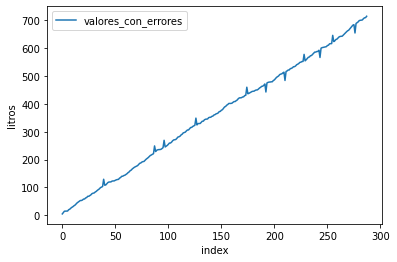

In [51]:
plt.plot(range(len(valores_con_errores)), valores_con_errores, label='valores_con_errores')
plt.xlabel('index')
plt.ylabel('litros')
plt.legend()

B)Obtengo la mediana para los 9 valores

In [52]:
def mediana(lista):
    lista_previa = lista
    new_list = []
    #Primero ordeno la lista
    while lista_previa:
        min = lista_previa[0]  
        for x in lista_previa: 
            if x < min:
                min = x
        new_list.append(min)
        lista_previa.remove(min)    

    index = len(new_list) // 2
    
    # Si la lista es impar  
    if len(new_list) % 2 != 0:
        return new_list[index]
    
    # Si la lista es par
    return (new_list[index - 1] + new_list[index]) / 2

print('Valores_b:', valores_b)
mediana_ =  mediana(valores_b)
print('Mediana:', mediana_)


Valores_b: [4.568183127564, 9.36099061242182, 14.3273829046456, 14.6026146986018, 14.7141574916741, 14.9660288979273, 19.6911907378142, 21.4024292125627, 25.1251543128942]
Mediana: 14.7141574916741


Funcion para aplicar la correccion a las mediciones erradas con la mediana

In [22]:
def filtro_mediana(valores_con_errores):

  valores_filtrados = valores_con_errores 

  for i, error in errores:
      error =  valores_con_errores[i]
      if(i>=4 and i<=((len(valores_filtrados)-1)-4)):
          lista_valores = valores_con_errores[i-4:i] + valores_con_errores[i:i+5]
          #print(lista_valores)
          valor_mediana = mediana(lista_valores) 

      elif(i<4):
          lista_valores = valores_con_errores[0:i] + valores_con_errores[i:2*i+1]
          valor_mediana = mediana(lista_valores)

      elif (i>((len(valores_filtrados)-1)-4) ):
          cant_posteriores = len(valores_filtrados)-1 - i
          lista_valores = valores_con_errores[i-cant_posteriores:i] + valores_con_errores[i:len(valores_filtrados)]
          valor_mediana = mediana(lista_valores)

      valores_filtrados[i] = valor_mediana #Aca reemplazo al error por la mediana aplicando el filtro
  
  return valores_filtrados


D)Grafico de los valores corregidos con el filtro para el dataset del inciso a

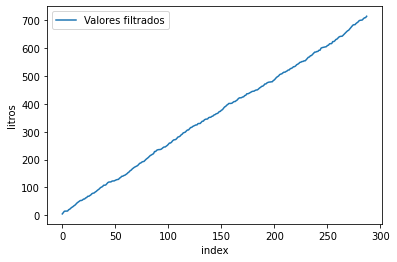

In [23]:
valores_filtrados = filtro_mediana(valores_con_errores)
plt.plot(range(len(valores_filtrados)), valores_filtrados, label='Valores filtrados')
plt.xlabel('index')
plt.ylabel('litros')
plt.legend()
plt.show()

C) y E) Aplico el filtro a todos los datasets empleando la funcion filtro_mediana(), obtengo listas con los valores corregidos(valores filtrados). Con dichas listas obtengo los flujos para cada dataset y hallo el flujo promedio de cada dataset empleando la función flujo_promedio(),este valor lo guardo en una lista de flujos promedios.
Finalmente con esta lista de promedios obtengo el gráfico del histograma


In [55]:
#Ahora aplico el filtro a todos los datasets

lista_flujos_promedios = []

#Funcion para hallar el flujo promedio
def flujo_promedio(lista_muestras):
  flujo_lista = []
  anterior = lista_muestras[0]
  for i in range(1,len(lista_muestras)):
    muestra = lista_muestras[i]
    delta_tiempo = 5 #el delta de tiempo es 300s o 5 min como se indica en la guia
    delta_litros = muestra - anterior
    flujo = delta_litros / delta_tiempo #El flujo se expresa como volumen por tiempo, en este caso litros sobre minutos
    flujo_lista.append(flujo)
    anterior = muestra
  promedio = sum(flujo_lista)/len(flujo_lista)
  return promedio
      
for i in range(100):
    file_name = "data/dpto_{:02d}".format(i) + '.csv' #Con este bloque de codigo puedo iterar los archivos de la carpeta data
    file = open(file_name, 'r')
    reader = csv.reader(file)
    next(reader) #Esto es para saltar el header 
    i = 0
    saltar = False
    valores_con_errores = []
    errores = []

    for row in reader:
        if saltar:
            anterior = float(row[1])
            valores_con_errores.append(anterior)
            saltar = False
            i+=1
            continue

        if i == 0:
            anterior = float(row[1])
            valores_con_errores.append(anterior)
        else:
            muestra = float(row[1])
            valores_con_errores.append(muestra)
            if((muestra<anterior) or (abs(muestra - anterior)>15)) : #Verifico si la muetra es menor a la anterior o si la diferencia es mayor a 15   
                errores.append((i, muestra))
                saltar = True
            else:
                saltar = False    
            anterior = muestra

        i+=1
    #C)Obtengo una lista con las mediciones corregidas por cada dpto
    valores_filtrados = filtro_mediana(valores_con_errores)
    #E)Hallo el flujo promedio de cada dpto
    flujo_avg = flujo_promedio(valores_filtrados)
    lista_flujos_promedios.append(flujo_avg)



Grafico del histograma



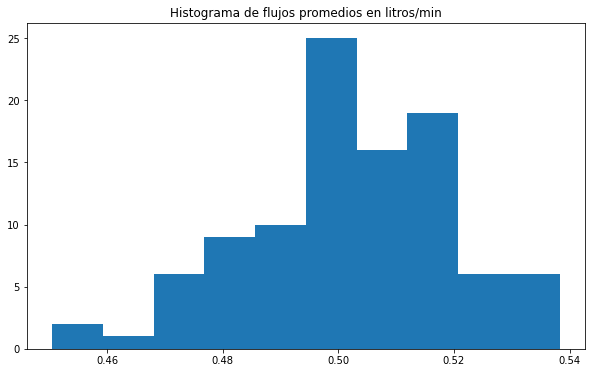

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(lista_flujos_promedios,bins = 10)
plt.title('Histograma de flujos promedios en litros/min')
plt.show()